# 2. Convolutional AutoEncoder MNIST

Reference: https://www.youtube.com/watch?v=ebPq0cILZV8

## Input libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TensorFlow
import tensorflow as tf

In [3]:
# Keras
from keras.datasets import mnist

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D # Dense

In [4]:
# Other Libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train.shape

(60000, 28, 28)

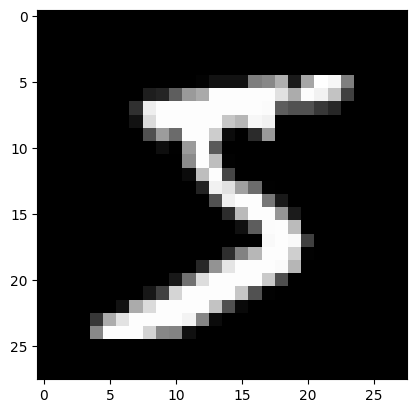

In [6]:
# Visualize one image
plt.imshow(X_train[0], cmap='gray')

### Preprocess the data

In [7]:
X_train[0].shape[0]

28

In [8]:
X_train.shape[0]

60000

In [9]:
28*28

784

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

x_train contains 60000 images of 28x28 pixels each. Now, we need to flatten the images into vectors of 28x28 = 784 pixels each. The result is that x_train will be a matrix of 6000 x 784 (28*28). We will repeat the same for x_test 10000 x 784 (28*28).

In [12]:
X_test[0].shape[1]

28

In [13]:
# Convert 2D image into 1D vector
X_train = X_train.reshape(X_train.shape[0], X_train[0].shape[0], X_train[0].shape[1], 1)
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape(X_test.shape[0], X_test[0].shape[1], X_test[0].shape[1], 1)
X_test.shape

(10000, 28, 28, 1)

Check the amplitude of the values in the x_train and x_test matrices. The values are between 0 and 255. We will normalize the values between 0 and 1 by dividing by 255.

In [15]:
X_train.max()

255

Normalize the data dividing the dataset by the max number, in this case 255.

In [16]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Check if the values are between 0 and 1.

In [17]:
X_train.max()

1.0

In [18]:
X_train.shape[0]

60000

In [19]:
X_train.shape[1]

28

## Model

In [20]:
# Define Layers
input_layer = Input(shape=(X_train[0].shape[0], X_train[0].shape[1], 1)) # (28, 28, 1)
input_layer.shape

TensorShape([None, 28, 28, 1])

In [21]:
# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer) # (6000, 28, 28, 16)
x = MaxPool2D(pool_size = (2,2), padding='same')(x) # (6000, 14, 14, 16)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) # (6000, 14, 14, 8)
x = MaxPool2D(pool_size = (2,2), padding='same')(x) # (6000, 7, 7, 8)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) # (6000, 7, 7, 8)
encoded = MaxPool2D(pool_size = (2,2), padding='same')(x) # (6000, 4, 4, 8)

In [22]:
# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded) # (4, 4, 8)
x = UpSampling2D((2, 2))(x) # (8, 8, 8)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) # (8, 8, 8)
x = UpSampling2D((2, 2))(x) # (16, 16, 8)
x = Conv2D(16, (3, 3), activation='relu')(x) # (14, 14, 16)
x = UpSampling2D((2, 2))(x) # (28, 28, 16)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # (28, 28, 1)

In [23]:
# Connect Layers intop the Model
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [24]:
# Compile the model using MSE loss and Adam Optimizer
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
# Fit training data to the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 9s 9ms/step - loss: 0.2112 - val_loss: 0.1462
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1336 - val_loss: 0.1239
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1211 - val_loss: 0.1168
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1157 - val_loss: 0.1126
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1122 - val_loss: 0.1095
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1095 - val_loss: 0.1076
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1073 - val_loss: 0.1053
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1056 - val_loss: 0.1036
Epoch 9/50
469/469 [==============================] - -3568s -7623339us/step - loss: 0.1041 - val_loss: 0.1025
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1029 - val_l

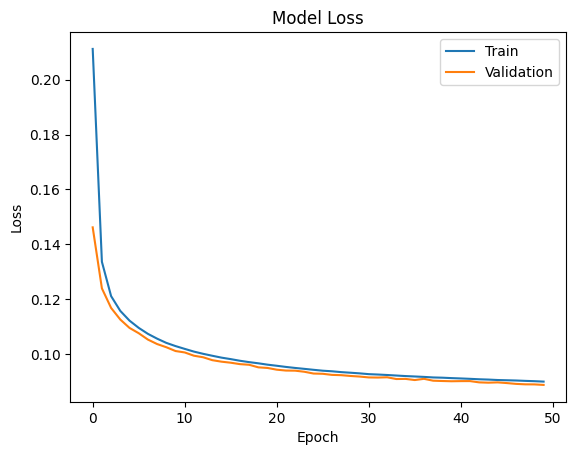

In [26]:
# Plot the training loss  and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
# Encoder Model 
encoder = Model(input_layer, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [28]:
# Decoder Model 
decoder_layer = Input(shape = (4, 4, 8))
decoder = autoencoder.layers[7](decoder_layer)

for layer in autoencoder.layers[8:]:
    decoder = layer(decoder)

decoder = Model(decoder_layer, decoder)
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168

In [29]:
# Encoder images for testing
encoded_images = encoder.predict(X_test)
encoded_images.shape

313/313 [==============================] - 1s 1ms/step


(10000, 4, 4, 8)

In [30]:
# Reconstrtuct images for testing
decoded_images = decoder.predict(encoded_images, verbose = 1)
decoded_images.shape

313/313 [==============================] - 1s 1ms/step


(10000, 28, 28, 1)

In [31]:
decoded_images = decoded_images.reshape(decoded_images.shape[0], decoded_images.shape[1], decoded_images.shape[2])
decoded_images.shape

(10000, 28, 28)

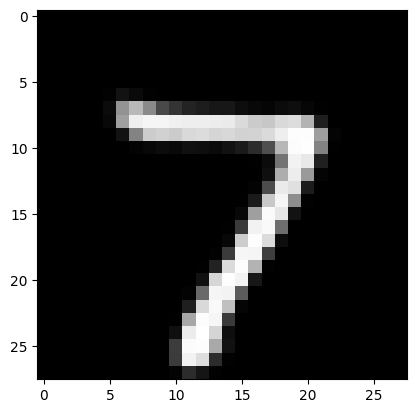

In [32]:
plt.imshow(decoded_images[0], cmap='gray')

In [33]:
decoded_images[0].shape

(28, 28)

In [34]:
# Reshape test image to 2D
X_test = X_test.reshape(X_test.shape[0], X_test[0].shape[0], X_test[0].shape[1])
X_test.shape

(10000, 28, 28)

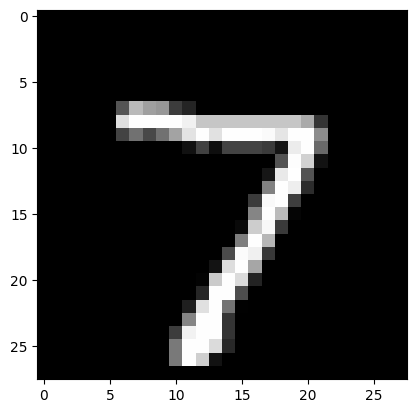

In [35]:
# Show test image
plt.imshow(X_test[0], cmap='gray')

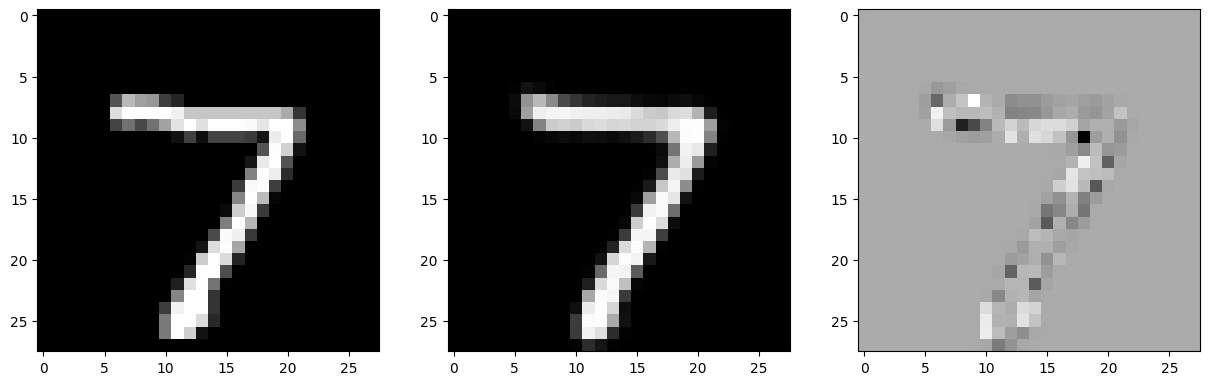

In [36]:
# Create a 1 row 3 column grid plot, where the 1st image is the test, 2nd is the output and 3rd is the difference between the two
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes[0].imshow(X_test[0], cmap='gray')
axes[1].imshow(decoded_images[0], cmap='gray')
axes[2].imshow(X_test[0] - decoded_images[0], cmap='gray')
plt.show()